In [34]:
import numpy as np
import matplotlib.pylab as plt
import matti_func as matti

n=1.5
fs = 15
col = ['blue', 'red', 'green', 'orange', 'purple', 'dimgrey', 'cyan', 'black', 'lime']
lin = ['-', (0,(3,3,1,3)), (0,(1,1)), (5,(10,3)), (0,(3,3,1,3,1,3)), (0,(5,5)), (2,(2,2,5)), (10,(2,2)), (1,(10,10))]
lw = 2  # plt default: 1.5

# direc = "/home/matti/Documents/data/benchmark_ist/first_try/" #pc dottorato
direc = "/home/mmencagl/tests/isteddas_tests/" 
GPUN = [1, 2, 4]
Ns = [2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144] # NS = [2**i for i in range(11,19)]

In [2]:
def read_scal_ist(Nstar):
    dname = direc + str(Nstar) + "/"
    err = []
    tprof = []
    for gn in GPUN:
        #questo legge le due colonne t e de/e per ogni numero di gpu. li mette nella lista err
        with open(dname + str(gn) + "gpu/output/diagnostic.dat") as f:
            file = f.readlines()
            file.pop(0)
            err.append(np.loadtxt(file,  usecols=(0,1)))
        #questo legge la penultima riga del time_prof_cumul. le mette nella lista tprof
        with open(dname + str(gn) + "gpu/logfiles/timeprofile.dat.cumul") as f:
            tprof.append(np.loadtxt([f.readlines()[-2]]))
    return err, np.array(tprof)


def name_lenovo(dir, gn, Nstar): return direc + "build_gpu" + str(gn) + "_stars" + str(Nstar) + "/bin/"
def read_scal_ist_lenovo(Nstar):
    err = []
    tprof = []
    for gn in GPUN:
        dname = name_lenovo(direc, gn, Nstar)
        print(dname)
        #questo legge le due colonne t e de/e per ogni numero di gpu. li mette nella lista err
        with open(dname + "output/diagnostic.dat") as f:
            file = f.readlines()
            file.pop(0)
            err.append(np.loadtxt(file,  usecols=(0,1)))
        #questo legge la penultima riga del time_prof_cumul. le mette nella lista tprof
        with open(dname + "logfiles/timeprofile.dat.cumul") as f:
            tprof.append(np.loadtxt([f.readlines()[-2]]))
    return err, np.array(tprof)


with open(name_lenovo(direc, GPUN[0], Ns[0]) + "logfiles/timeprofile.dat.cumul") as f:
    profname = f.readlines()[-1].strip().split()
for i in range(len(profname)):
    print("{} : {}".format(i,profname[i]))

lista = []
for ns in Ns:
    lista.append(read_scal_ist_lenovo(ns))

0 : Nsteps
1 : INIT
2 : oldI-forces
3 : EVAL-buildtree
4 : I-forces
5 : ANN-transfers
6 : ANN-treeonly
7 : ANN-searchonly
8 : PERSTEP
9 : ActivePart
10 : AdvanceStep
11 : predictor
12 : evaluation
13 : EVAL-kernelI
14 : EVAL-kernelN
15 : EVAL-acc3corr
16 : EVAL-read
17 : EVAL-mpi-red
18 : EVAL-mpi-gat
19 : corrector
20 : UpdateDT
21 : REsynch
22 : prints
/home/mmencagl/tests/isteddas_tests/build_gpu1_stars2048/bin/
/home/mmencagl/tests/isteddas_tests/build_gpu2_stars2048/bin/
/home/mmencagl/tests/isteddas_tests/build_gpu4_stars2048/bin/
/home/mmencagl/tests/isteddas_tests/build_gpu1_stars4096/bin/
/home/mmencagl/tests/isteddas_tests/build_gpu2_stars4096/bin/
/home/mmencagl/tests/isteddas_tests/build_gpu4_stars4096/bin/
/home/mmencagl/tests/isteddas_tests/build_gpu1_stars8192/bin/
/home/mmencagl/tests/isteddas_tests/build_gpu2_stars8192/bin/
/home/mmencagl/tests/isteddas_tests/build_gpu4_stars8192/bin/
/home/mmencagl/tests/isteddas_tests/build_gpu1_stars16384/bin/
/home/mmencagl/tests/i

In [5]:
for i in range(len(Ns)):
    print("stars: {}".format(Ns[i]))
    print(lista[i][1][:,4] / lista[i][1][-1,4])
    print(lista[i][1][:,4])
    print(lista[i][1][:,16] / lista[i][1][-1,16])
    print(lista[i][1][:,16])

stars: 2048
[1.10492769 0.88267349 1.        ]
[0.180459 0.14416  0.163322]
[0.25797956 0.50046268 1.        ]
[0.521338 1.01136  2.02085 ]
stars: 4096
[1.49831909 1.10950592 1.        ]
[0.37928  0.280857 0.253137]
[0.24638952 0.5136695  1.        ]
[0.738114 1.53881  2.99572 ]
stars: 8192
[2.28757866 1.34600604 1.        ]
[0.978617 0.575816 0.427796]
[0.25020262 0.49902291 1.        ]
[1.05885 2.11185 4.23197]
stars: 16384
[3.17591143 1.66291403 1.        ]
[3.75199 1.96455 1.18139]
[0.24767668 0.49475196 1.        ]
[1.77497 3.54563 7.16648]
stars: 32768
[3.90848401 1.89020458 1.        ]
[15.7841   7.63344  4.03842]
[0.26779534 0.49862912 1.        ]
[ 3.18805  5.93608 11.9048 ]
stars: 65536
[4.21973269 1.993877   1.        ]
[71.6038 33.8337 16.9688]
[0.25549729 0.50695049 1.        ]
[ 5.48637 10.8859  21.4733 ]
stars: 131072
[4.39347489 2.04124824 1.        ]
[341.076  158.467   77.6324]
[0.25731269 0.50199514 1.        ]
[10.5755 20.6319 41.0998]
stars: 262144
[4.65539792 2.15

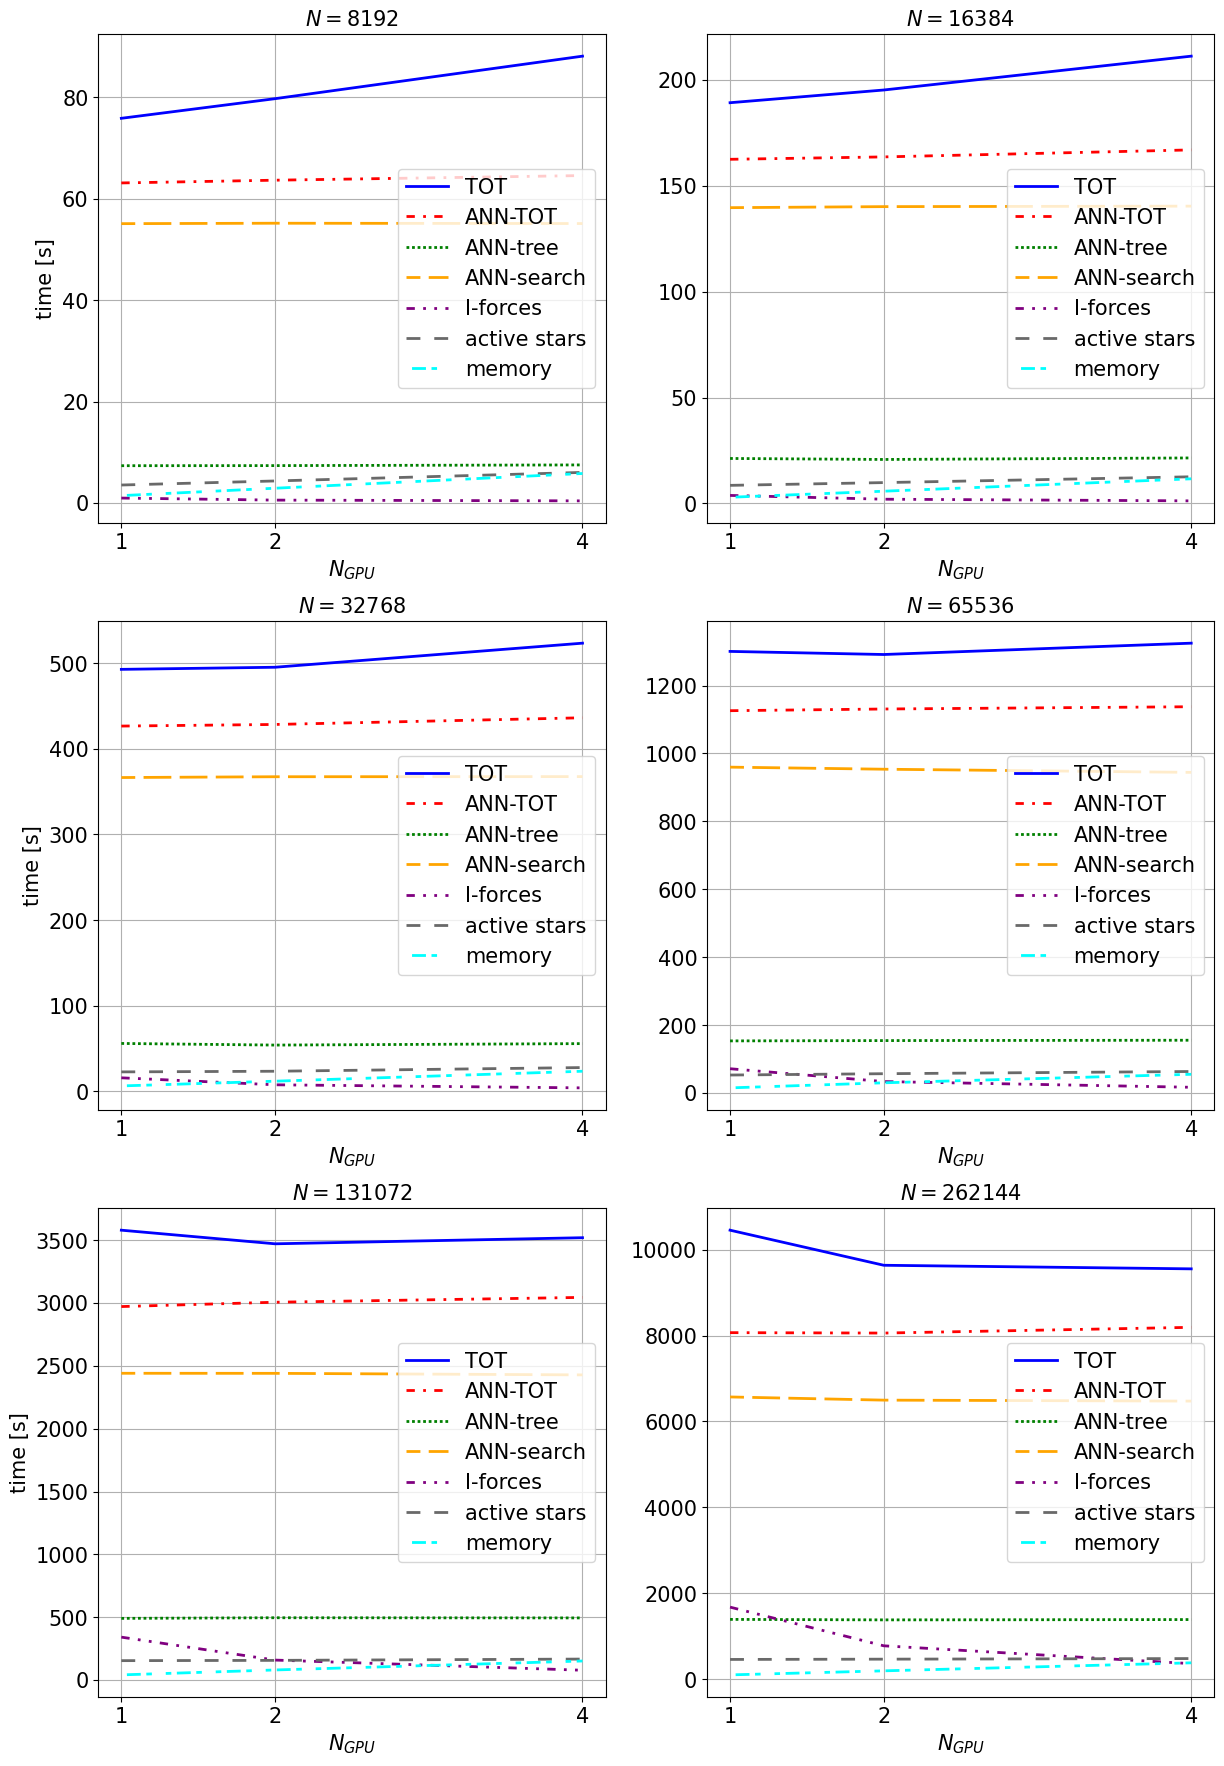

In [48]:
def plot_scal_N(i, ax, select):
    j = 0
    match select:
        case "Iforce_scale":
            _ = ax.plot(GPUN, lista[i][1][0,4]/lista[i][1][:,4], linestyle=lin[j], linewidth=lw, color=col[j], label = 'Iforces'); j+=1
            #_ = ax.plot(GPUN, lista[i][1][0,8]/lista[i][1][:,8], linestyle=lin[j], linewidth=lw, color=col[j], label = 'TOT'); j+=1
            _ = ax.plot(GPUN, GPUN, linestyle=lin[j], linewidth=lw, color=col[j], label = 'Ideal Scal'); j+=1
        case "TOT_ANN_IF":
            _ = ax.plot(GPUN, lista[i][1][:,8], linestyle=lin[j], linewidth=lw, color=col[j], label = 'TOT'); j+=1
            #_ = ax.plot(GPUN, lista[i][1][:,8]-lista[i][1][:,19], linestyle=lin[j], linewidth=lw, color=col[j], label = 'TOT-MPI'); j+=1
            # _ = ax.plot(GPUN, lista[i][1][:,19], linestyle=lin[j], linewidth=lw, color=col[j], label = 'MPI'); j+=1
            _ = ax.plot(GPUN, lista[i][1][:,3], linestyle=lin[j], linewidth=lw, color=col[j], label = 'ANN-TOT'); j+=1
            #_ = ax.plot(GPUN, lista[i][1][:,5], linestyle=lin[j], linewidth=lw, color=col[j], label = 'ANN-transfer'); j+=1
            _ = ax.plot(GPUN, lista[i][1][:,6], linestyle=lin[j], linewidth=lw, color=col[j], label = 'ANN-tree'); j+=1
            _ = ax.plot(GPUN, lista[i][1][:,7], linestyle=lin[j], linewidth=lw, color=col[j], label = 'ANN-search'); j+=1
            _ = ax.plot(GPUN, lista[i][1][:,4], linestyle=lin[j], linewidth=lw, color=col[j], label = 'I-forces'); j+=1
            _ = ax.plot(GPUN, lista[i][1][:,9], linestyle=lin[j], linewidth=lw, color=col[j], label = 'active stars'); j+=1
            _ = ax.plot(GPUN, lista[i][1][:,16]+lista[i][1][:,5], linestyle=lin[j], linewidth=lw, color=col[j], label = 'memory'); j+=1
            #_ = ax.plot(GPUN, lista[i][1][:,14], linestyle=lin[j], linewidth=lw, color=col[j], label = 'N-forces'); j+=1
            #_ = ax.plot(GPUN, lista[i][1][:,11], linestyle=lin[j], linewidth=lw, color=col[j], label = 'predictor'); j+=1
            #_ = ax.plot(GPUN, lista[i][1][:,19], linestyle=lin[j], linewidth=lw, color=col[j], label = 'corrector'); j+=1
            #_ = ax.plot(GPUN, lista[i][1][:,16], linestyle=lin[j], linewidth=lw, color=col[j], label = 'EVAL-read'); j+=1
            # _ = ax.plot(GPUN, lista[i][1][:,14]-lista[i][1][:,19], linestyle=lin[j], linewidth=lw, color=col[j], label = 'eva-MPI'); j+=1
        case "hermite_6th":
            _ = ax.plot(GPUN, lista[i][1][:,4], linestyle=lin[j], linewidth=lw, color=col[j], label = 'I-forces'); j+=1
            _ = ax.plot(GPUN, lista[i][1][:,14], linestyle=lin[j], linewidth=lw, color=col[j], label = 'N-forces'); j+=1
            _ = ax.plot(GPUN, lista[i][1][:,2], linestyle=lin[j], linewidth=lw, color=col[j], label = 'oldI-forces'); j+=1
            _ = ax.plot(GPUN, lista[i][1][:,11], linestyle=lin[j], linewidth=lw, color=col[j], label = 'predictor'); j+=1
            _ = ax.plot(GPUN, lista[i][1][:,19], linestyle=lin[j], linewidth=lw, color=col[j], label = 'corrector'); j+=1
            _ = ax.plot(GPUN, lista[i][1][:,9], linestyle=lin[j], linewidth=lw, color=col[j], label = 'active stars'); j+=1
            _ = ax.plot(GPUN, lista[i][1][:,20], linestyle=lin[j], linewidth=lw, color=col[j], label = 'update Dt'); j+=1
            _ = ax.plot(GPUN, lista[i][1][:,16]+lista[i][1][:,5], linestyle=lin[j], linewidth=lw, color=col[j], label = 'memory'); j+=1
            
    #_ = ax.set_yscale("log", base=10)
    _ = ax.set_xlabel(r'$N_{GPU}$', fontsize=fs)
    if(i%2==0):
        _ = ax.set_ylabel(r'time [s]', fontsize=fs)
    _ = ax.set_xticks(ticks=GPUN)
    _ = ax.legend(fontsize=fs)
    _ = ax.set_title(r'$N=%d$'%Ns[i],fontsize=fs)
    _ = ax.tick_params(axis='both', labelsize=fs)
    _ = ax.grid()

SAVE = False
    
#select = "Iforce_scale"
select = "TOT_ANN_IF"
#select = "hermite_6th"

COL = 2 ; RIG = 3
fig = plt.figure(666, figsize=[n*4.8*COL,n*4.8*RIG])
gs = fig.add_gridspec(RIG,COL)#, hspace=0)
axs = gs.subplots()#sharex=True, sharey=True)
off=2
for i in range(off,RIG*COL+off):
    plot_scal_N(i, axs[int((i-off)/COL),(i-off)%COL], select)
    
if(SAVE):
    _ = plt.savefig(direc+select+".pdf", bbox_inches='tight', format='pdf')
    _ = plt.show(True)

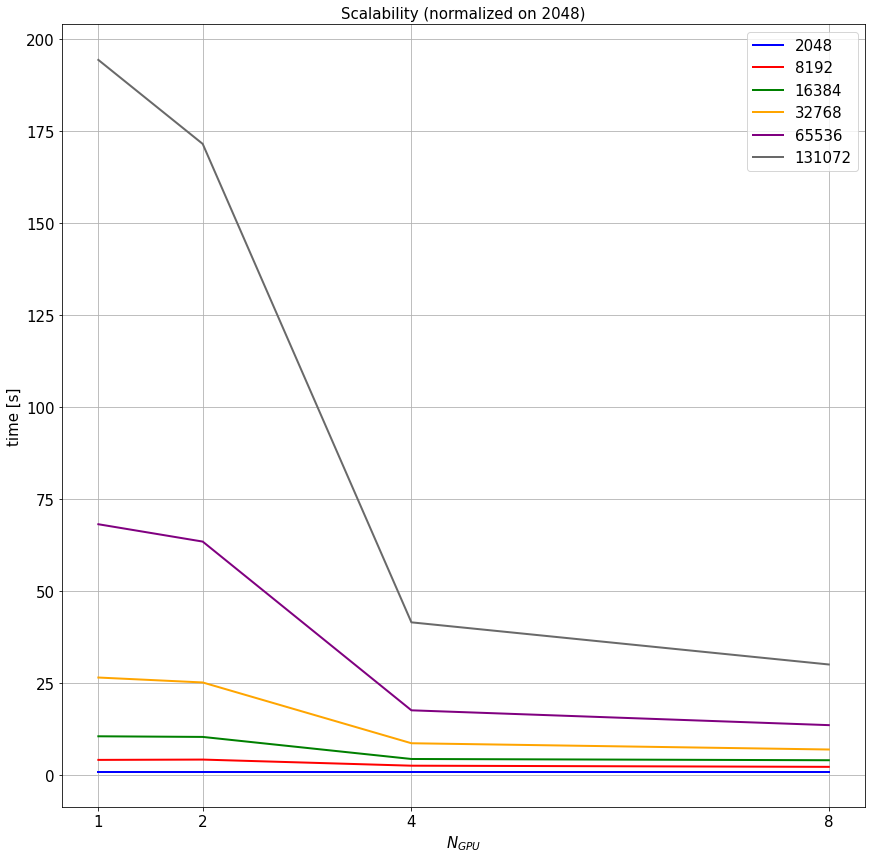

In [77]:
def plot_scal(i):
    for i in range(len(Ns)):
        _ = ax.plot(GPUN, np.array(lista[i][1][:,9]) / np.array(lista[0][1][:,9]), linestyle=lin[0], linewidth=lw, color=col[i], label = '%d'%Ns[i])
        # _ = ax.plot(GPUN, lista[i][1][:,19], linestyle=lin[1], linewidth=lw, color=col[1], label = 'MPI')
        # _ = ax.plot(GPUN, (lista[i][1][:,9]-lista[i][1][:,19])/ lista[i][1][3,9], linestyle=lin[1], linewidth=lw, color=col[i])#, label = 'TOT-MPI %d'%Ns[i])
        # _ = ax.plot(GPUN, lista[i][1][:,11], linestyle=lin[3], linewidth=lw, color=col[3], label = 'advancestep')
        # _ = ax.set_yscale("log", base=10)
    _ = ax.set_xlabel(r'$N_{GPU}$', fontsize=fs)
    _ = ax.set_ylabel(r'time [s]', fontsize=fs)
    _ = ax.set_xticks(ticks=GPUN)
    _ = ax.legend(fontsize=fs)
    _ = ax.set_title(r'Scalability (normalized on 2048)',fontsize=fs)
    _ = ax.tick_params(axis='both', labelsize=fs)
    _ = ax.grid()
        
fig = plt.figure(999, figsize=[n*4.8*2,n*4.8*2])
ax = fig.subplots()#sharex=True, sharey=True)
plot_scal(ax)

if(SAVE):
    _ = plt.savefig(direc+"scalN.pdf", bbox_inches='tight', format='pdf')
    _ = plt.show(True)